# Project 1 - Classical Mechanics and ODEs

### <p style="text-align: right;">  Kyle Taft

In [1]:
# Import packages
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Motivation/Background

This problem is inspired by Example 6.5.2 and 6.5.3 from Nonlinear Dynamics and Chaos by Steven Strogatz. Additionally, we discussed a similar problem in class. I choose to expand the problem by another dimension for extra credit to explore higher complexity. The problem is as follows:

Consider a particle of mass $m=1$ moving in a 2D double-well potential $V(x,y) = -x^2 + 0.25x^4 + 3y^2$

Some of the assumptions for this system are as follows:
- The particle is moving in a frictionless environment
- The varying of x and y are independent of each other

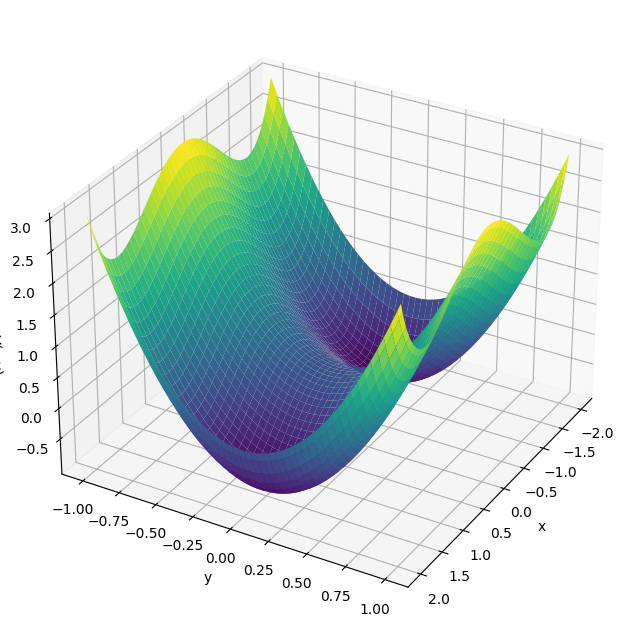

In [2]:
# Define potential function
V = lambda x, y: -x**2 + 0.25*x**4 + 3*y**2

# Visualize the problem on 3D plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Plotting functions
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V(X, Y), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')

# Change perspective -> NOTE: Feel free to vary the angles to explore
ax.view_init(30, 30)
plt.show()


## Analytical Investigation

We can easily take this potential and find the equations of motion for the system. Note that the equation of force and acceleration are the same since the mass equals 1. So we only need to take the negative gradient of the potential. The equations of motion are as follows:

$$-\frac{\partial V}{\partial x} = \ddot{x} =  2x - x^3$$

$$-\frac{\partial V}{\partial y} = \ddot{y} = -6y$$

Additionally, we can use our standard procedure to write in terms of first order ODEs:

$$\dot{x} = v_x$$

$$\dot{v_x} = 2x - x^3$$

$$\dot{y} = v_y$$

$$\dot{v_y} = -6y$$

This will be helpful for our numerical investigation.


Going back to looking at the 2nd order ODEs, we make multiple claims about how the system behaves. 

1. The system conserves energy. We can show this to be by seeing that the total energy's derivative with respect to time is 0:

$$E = \frac{1}{2}(\dot{x}^2 + \dot{y}^2) + V(x,y)$$

$$\frac{dE}{dt} = \dot{x}\ddot{x} + \dot{y}\ddot{y} + \frac{\partial V}{\partial x}\dot{x} + \frac{\partial V}{\partial y}\dot{y}$$

$$\frac{dE}{dt} = \dot{x}(2x - x^3) + \dot{y}(-6y) + (-2x+x^3)\dot{x} + (6y^2)\dot{y}$$

$$\frac{dE}{dt} = 0$$
<br>
2. Looking at the x EOM, we can compare it to the Duffing oscillator equation:
   
$$\ddot{x} = - \delta \dot{x} - \alpha x - \beta x^3 + \gamma \cos(\omega t)$$

We can see that the x EOM is the same as the Duffing oscillator equation with $\delta = 0$, $\alpha = -2$, $\beta = 1$, and $\gamma = 0$. This means that it is a undamp and unforced Duffing oscillator. Looking at the [Wikipedia page](https://en.wikipedia.org/wiki/Duffing_equation) it points out the relation of "Jacobi elliptic function" for this special condition allowing for an analyitical solution. I tried to solve this analytically using this method but I was limited by my lack of knowledge of this method. 

Nevertheless, by looking at the graph of the potential we can still draw conclusions of expected behaviors. At initial condition of x = 0 v_x = 0 we get no movement in the x direction. At -2 < x < 2 v_x=0 we get an oscillation in the well it starts in. At x < -2 and x > 2 v_x=0 we get an oscillation between the two wells. 


<br>
3. Looking at the y EOM, we can see that it is a simple harmonic oscillator with a spring constant of 6. Looking at the graph above this makes sense since in the y direction we get a parabola that a particle would roll back and forth in. This gives us an analytical solution when vy = 0 of:

$$y(t) = y_0\cos(\sqrt{6}t)$$


## Computational Investigation

In [3]:
# Phase diagram and trajectories

# Define ODEs
def xODE(x,vx):
    xdot, vxdot = vx, 2*x - x**3
    return xdot, vxdot

def yODE(y,vy):
    ydot, vydot = vy, -6*y
    return ydot, vydot

# Define phase diagram functions (copied from ICAs)
def xPhase(X, VX):
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            vxloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = xODE(xloc, vxloc)
    return xdot, vxdot

def yPhase(Y, VY):
    ydot, vydot = np.zeros(Y.shape), np.zeros(VY.shape)
    Xlim, Ylim = Y.shape
    for i in range(Xlim):
        for j in range(Ylim):
            yloc = Y[i, j]
            vyloc = VY[i, j]
            ydot[i,j], vydot[i,j] = yODE(yloc, vyloc)
    return ydot, vydot

# Put into format for solve_ivp to find trajectories
def x_IVP(t, curr_val):
    xdot, vxdot = xODE(curr_val[0], curr_val[1])
    return [xdot, vxdot]

def y_IVP(t, curr_val):
    ydot, vydot = yODE(curr_val[0], curr_val[1])
    return [ydot, vydot]

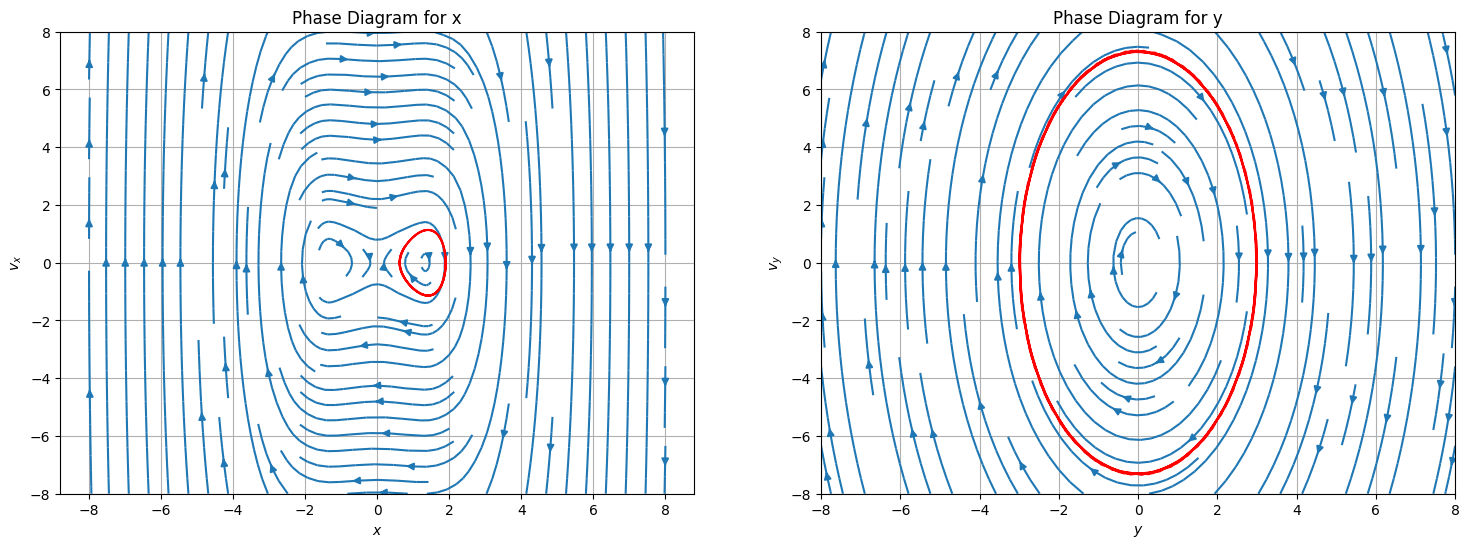

In [4]:
# Initialize variables
x = np.linspace(-8, 8, 20)
vx = np.linspace(-8, 8, 20)
y = np.linspace(-8, 8, 20)
vy = np.linspace(-8, 8, 20)

X, VX = np.meshgrid(x, vx)
Y, VY = np.meshgrid(y, vy)

tmax = 10
t = np.linspace(0, tmax, 100)
tspan = (0, tmax)

# Set initial conditions -> NOTE: Feel free to vary the initial conditions to explore
init_condX = [1.9, 0]
init_condY = [3, 0]

# Solve for trajectories
solX = solve_ivp(x_IVP, tspan, init_condX, t_eval=t, method='RK45')
solY = solve_ivp(y_IVP, tspan, init_condY, t_eval=t, method='RK45')

# Plot phase diagram
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.streamplot(X, VX, xPhase(X, VX)[0], xPhase(X, VX)[1])
plt.plot(solX.y[0], solX.y[1], c='red')
plt.title('Phase Diagram for x')
plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

plt.subplot(1, 2, 2)
plt.streamplot(Y, VY, yPhase(Y, VY)[0], yPhase(Y, VY)[1])
plt.plot(solY.y[0], solY.y[1], c='red')
plt.title('Phase Diagram for y')
plt.xlabel('$y$')
plt.ylabel('$v_y$')
plt.grid()
plt.show()



### Comments on phase diagrams:

The phase diagrams are shown to be what we expected. The x phase diagram shows multiple different behaviors.At -2 < x < 2 v_x=0 we get a simple oscillation in the well it starts in. At x < -2 and x > 2 v_x=0 we get the double oscillation. The y phase diagram shows that for any y at v_y=0 we simply go to -y and then back to y.

An interesting result that I neglected to discuss in the analytical investigation are situations where the initial velocities are infact not 0. 

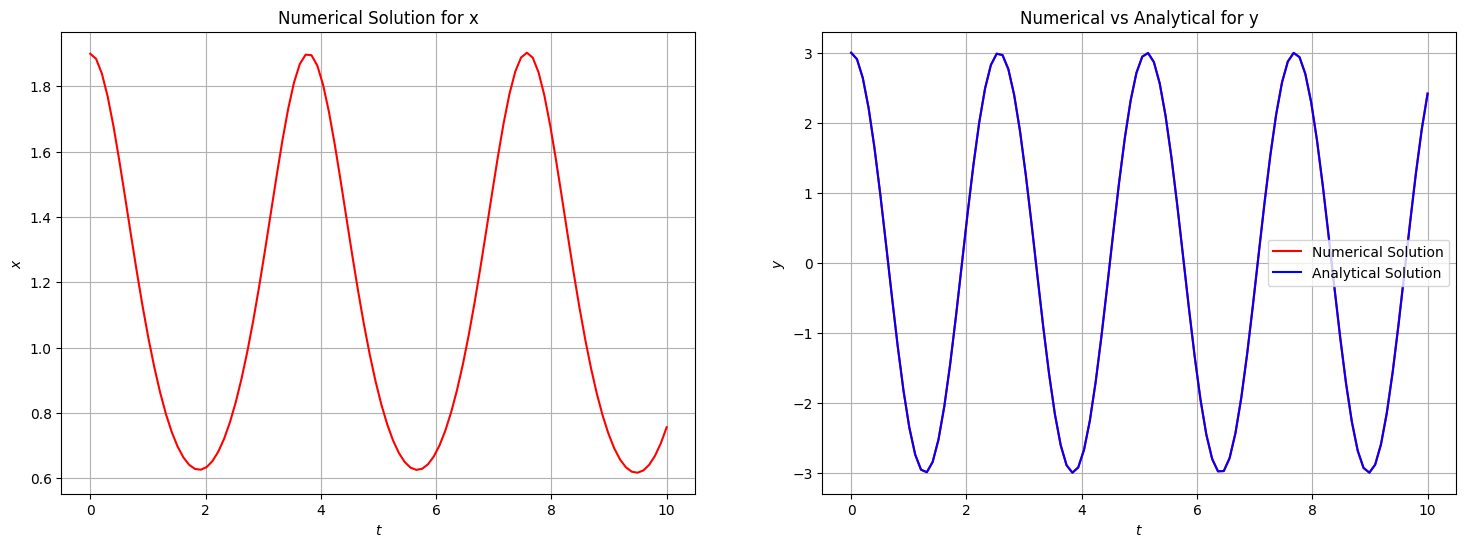

In [5]:
# Inspecting numerical solutions

# Plot numerical solutions
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(solX.t, solX.y[0], c='red')
plt.title('Numerical Solution for x')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(solY.t, solY.y[0], c='red', label='Numerical Solution')
plt.plot(solY.t, init_condY[0]*np.cos(np.sqrt(6)*solY.t), c='blue', label='Analytical Solution')
plt.title('Numerical vs Analytical for y')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.grid()
plt.legend()
plt.show()


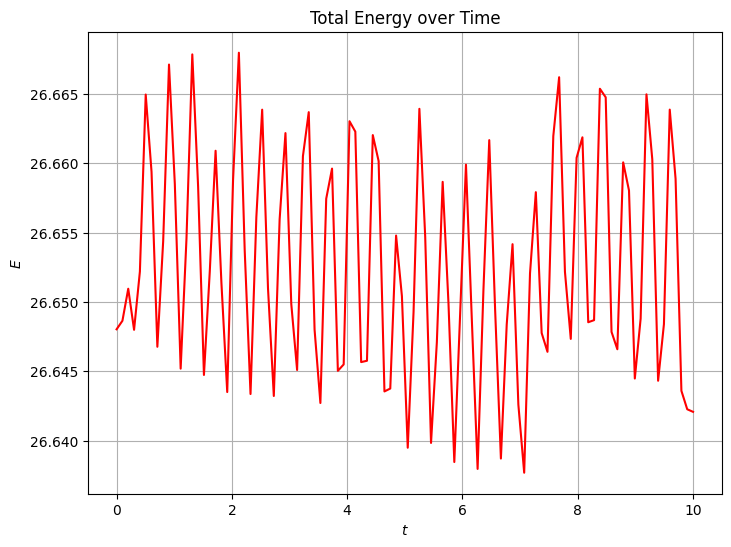

In [6]:
# Inspecting energy

# Define energy function
def energy(x, vx, y, vy):
    return 0.5*(vx**2 + vy**2) + V(x, y)

# Plot energy
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(solX.t, energy(solX.y[0], solX.y[1], solY.y[0], solY.y[1]), c='red')
plt.title('Total Energy over Time')
plt.xlabel('$t$')
plt.ylabel('$E$')
plt.grid()


### Comments on total energy plot

The energy plot shows that the system does indeed conserve energy as it only varies marginally. This is expected since we showed analytically that the system conserves energy.

## Visualizing different initial conditions

In [7]:
init1 = [0, 0, 0, 0] # No energy
init2 = [1.9, 0, 0, 0] # Oscillation stuck in potential well
init3 = [3, 2, 1, 0] # Oscillation going between potential wells
init4 = [0, 0, 5, 0] # Oscillation in y
init5 = [0, 0, 3, 2] # Oscillation in y with vx
init6 = [4, 0, 2, 0] # Oscillation in x and y

def IVP(t, curr_val):
    xdot, vxdot = xODE(curr_val[0], curr_val[1])
    ydot, vydot = yODE(curr_val[2], curr_val[3])
    return [xdot, vxdot, ydot, vydot]

# Initialize variables
tmax = 5
t = np.linspace(0, tmax, 40)
tspan = (0, tmax)

# Solve for trajectories
sol1 = solve_ivp(IVP, tspan, init1, t_eval=t, method='RK45')
sol2 = solve_ivp(IVP, tspan, init2, t_eval=t, method='RK45')
sol3 = solve_ivp(IVP, tspan, init3, t_eval=t, method='RK45')
sol4 = solve_ivp(IVP, tspan, init4, t_eval=t, method='RK45')
sol5 = solve_ivp(IVP, tspan, init5, t_eval=t, method='RK45')
sol6 = solve_ivp(IVP, tspan, init6, t_eval=t, method='RK45')

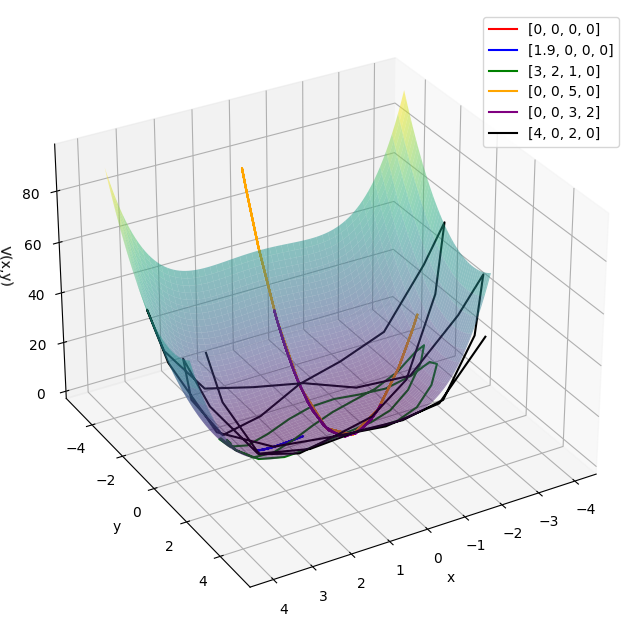

In [8]:
# Plot trajectories on potential

# Plot potential
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 1, 100)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V(X, Y), cmap='viridis', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')

# Plot trajectories
plt.plot(sol1.y[0], sol1.y[2], V(sol1.y[0], sol1.y[2]), c='red', label='[0, 0, 0, 0]')
plt.plot(sol2.y[0], sol2.y[2], V(sol2.y[0], sol2.y[2]), c='blue', label='[1.9, 0, 0, 0]')
plt.plot(sol3.y[0], sol3.y[2], V(sol3.y[0], sol3.y[2]), c='green', label='[3, 2, 1, 0]')
plt.plot(sol4.y[0], sol4.y[2], V(sol4.y[0], sol4.y[2]), c='orange', label='[0, 0, 5, 0]')
plt.plot(sol5.y[0], sol5.y[2], V(sol5.y[0], sol5.y[2]), c='purple', label='[0, 0, 3, 2]')
plt.plot(sol6.y[0], sol6.y[2], V(sol6.y[0], sol6.y[2]), c='black', label='[4, 0, 2, 0]')
plt.legend()

# Change perspective -> NOTE: Feel free to vary the angles to explore
ax.view_init(30, 60)

plt.show()


In [9]:
# Plot as animation (because I'm addicted to them because they're cool)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def init():
    print("init")


def update(frame):
    if frame % 20 == 0:
        print(frame)
    # Plot potential
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    X, Y = np.meshgrid(x, y)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, V(X, Y), cmap='viridis', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x,y)')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.view_init(30, 60)
    # # Plot trajectories
    ax.plot(sol2.y[0][:frame], sol2.y[2][:frame], V(sol2.y[0][:frame], sol2.y[2][:frame]), c='blue', label='[1.9, 0, 0, 0]')
    ax.plot(sol3.y[0][:frame], sol3.y[2][:frame], V(sol3.y[0][:frame], sol3.y[2][:frame]), c='green', label='[3, 2, 1, 0]')
    ax.plot(sol4.y[0][:frame], sol4.y[2][:frame], V(sol4.y[0][:frame], sol4.y[2][:frame]), c='orange', label='[0, 0, 5, 0]')
    ax.plot(sol5.y[0][:frame], sol5.y[2][:frame], V(sol5.y[0][:frame], sol5.y[2][:frame]), c='purple', label='[0, 0, 3, 2]')
    ax.plot(sol6.y[0][:frame], sol6.y[2][:frame], V(sol6.y[0][:frame], sol6.y[2][:frame]), c='black', label='[4, 0, 2, 0]')

    #Plot current point
    ax.scatter(sol2.y[0][frame], sol2.y[2][frame], V(sol2.y[0][frame], sol2.y[2][frame]), c='blue')
    ax.scatter(sol3.y[0][frame], sol3.y[2][frame], V(sol3.y[0][frame], sol3.y[2][frame]), c='green')
    ax.scatter(sol4.y[0][frame], sol4.y[2][frame], V(sol4.y[0][frame], sol4.y[2][frame]), c='orange')
    ax.scatter(sol5.y[0][frame], sol5.y[2][frame], V(sol5.y[0][frame], sol5.y[2][frame]), c='purple')
    ax.scatter(sol6.y[0][frame], sol6.y[2][frame], V(sol6.y[0][frame], sol6.y[2][frame]), c='black')
    ax.legend()
    

num_frames = len(t)
ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=False, interval=150);
plt.close()




In [12]:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

In [11]:
# # Save as gif
# ani.save('project1.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


init
0
20
